### Importing Data and Getting actual Columns

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv(r"C:\Users\abc\Documents\Python Scripts\LendingClubCaseStudy\loan_dataset\loan.csv")

data_col_name=list(df.columns.values)
print(df.shape)

(39717, 111)


C:\Users\abc\AppData\Local\Temp\ipykernel_5044\321699502.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\abc\Documents\Python Scripts\LendingClubCaseStudy\loan_dataset\loan.csv")


### Fixing Rows and Columns

#### Fix Columns  =>  Delete Necessary Columns

In [2]:
# Deleting Columns with all NAN Values

df = df.dropna(axis=1, how='all')


#print("Shape After Dropping All Nan's===> ",df.shape)
#print("Column List After Dropping all Nan's===> ",df.columns)


In [3]:
#Deleting Irrelevant Columns

del df['collections_12_mths_ex_med'] #===> Contains all 0 , NAN values
del df['application_type'] #===> Contains only "Individual" value
del df['acc_now_delinq'] #===> Contains only 0 value
del df['chargeoff_within_12_mths'] #===> Contains only 0 or NaN
del df['pymnt_plan'] #===> Contains only n values
del df['pub_rec'] #===> Deleting this as it has only 0 values
del df['initial_list_status'] #===> Contains only record of 'f' value
del df['delinq_amnt']#===> Contains only 0 value
del df['tax_liens'] #===> This column can be deleted as it has only 0 unique values
del df['id']
del df['url']
del df['desc']
del df['policy_code'] #===> Contains only value 1




#### Remove Missing Values => Columns

In [4]:
# df['mths_since_last_record'].isnull().value_counts() # Have more than 36931 NAN values
del df['mths_since_last_record']

# df['mths_since_last_delinq'].isnull().value_counts() #===> Contains 25682 NaN values ,Hence Deleting this record
del df['mths_since_last_delinq']


df['out_prncp'].value_counts() #===> 38577/ 39717 are 0 
df['out_prncp_inv'].value_counts() #===> 38577 / 39717 are 0 


del df['out_prncp']
del df['out_prncp_inv']


df['next_pymnt_d'].isnull().value_counts() #===> 38577 / 39717 are NAN
del df['next_pymnt_d']

#### Fix Columns => Rename Column Consistency

In [5]:
df.rename(columns = {'loan_amnt':'loan_amount',
                     'funded_amnt':'funded_amount',
                     'funded_amnt_inv':'funded_amount_by_investor',
                     'emp_length':'employee_length_in_years',# cleaning => done
                     'term':'term_in_months',#cleaning => done
                     'int_rate':'interest_rate_in_%', #cleaning => done
                     'installment':'installment',#datatypeConversion => done
                     "emp_title":"employee_title",#missing Values => done
                     "home_ownership":"home_ownership",#Our values are: RENT, OWN, MORTGAGE, OTHER.
                     "annual_inc":"annual_income",#Convert float to int => done
                     "verification_status":"verification_status",# Verified,Source Verified,Not Verified
                     "issue_d":"issue_date",#Have month and Date ex: Dec-11
                     "loan_status":"loan_status", # 'Fully Paid', 'Charged Off', 'Current'
                     "purpose":"purpose",
                     "title":"loan_title",#done
                     "zip_code":"zip_code",
                     "addr_state":"address_state",
                     "dti":"dti",#Datatype conversion to  float done
                     "delinq_2yrs":"delinquency_cases_past_2yrs", # If the borrower has not paid amount past 30+ due days 
                     "earliest_cr_line":"earliest_credit_line_in_month",#cleaning
                     "inq_last_6mths":"inquries_in_6months",#excluding auto and mortgage inquiries
                     "open_acc":"no_open_credit_lines", #int
                     "revol_bal":"revolving_credit_bal",#int
                     "revol_util":"revolving_credit_utilization_in_%",#Cleaning
                     "total_acc":"total_no_credit_lines",#int
                     "total_pymnt":"total_paymnt",# convert to int
                     "total_pymnt_inv":"total_payment_by_investor",# convert to int
                     "total_rec_prncp":"total_received_principle",#convert to int
                     "total_rec_int":"total_received_interest",#covert to int
                     "total_rec_late_fee":"total_received_late_fee",#convert to int
                     "recoveries":"recoveries",#convert to int
                     "collection_recovery_fee":"collection_recovery_fee",#convert to int
                     "last_pymnt_d":"last_payment_month",#convert to date
                     "last_pymnt_amnt":"last_payment_amount",#convert to int
                     "last_credit_pull_d":"last_credit_pull_month",#convert to date
                     "pub_rec_bankruptcies":"public_record_bankruptcies"
                    }, inplace = True)



#### Fill missing values 

In [6]:
# employee_title has 2459 missing values , replaced missing values by XXX

#print(df["employee_title"].isnull().value_counts()) #should be ==> 39717

#print(df["employee_title"].unique())

df["employee_title"].fillna("XXX",inplace=True)


In [7]:

print("Before Conversoin, Null values in Column employee_length_in_years =========>\n",df["employee_length_in_years"].isnull().value_counts()) #should be ==> 39717
# employee_length_in_years has 1075 missing values , replaced missing values by median

df['employee_length_in_years']=df['employee_length_in_years'].str.extract('(\d+)', expand=False)
df['employee_length_in_years'].fillna(df['employee_length_in_years'].median(),inplace=True)
df['employee_length_in_years']=df['employee_length_in_years'].astype(int)
print("After conversion ===========>\n",df["employee_length_in_years"].isnull().value_counts())
# converting employee_length_in_years to int

Before Conversoin, Null values in Column employee_length_in_years =========>
 False    38642
True      1075
Name: employee_length_in_years, dtype: int64
After conversion ===========>
 False    39717
Name: employee_length_in_years, dtype: int64


In [8]:
df['term_in_months']=df['term_in_months'].str.extract('(\d+)', expand=False)
#extracting numbers from month
df['term_in_months']=df['term_in_months'].astype(int)

In [9]:
df['interest_rate_in_%']=df['interest_rate_in_%'].str.extract('(\d+)', expand=False)

In [10]:
#df['issue_date']

In [11]:
df["loan_title"].fillna("YYY",inplace=True)

In [12]:
df["dti"]=df["dti"].astype(float)

In [13]:
#df['public_record_bankruptcies'].fillna(df['public_record_bankruptcies'].median(), inplace=True)

In [14]:
df['last_payment_month'].fillna(df["issue_date"],inplace=True) #===> Filling 75 places of NAN in last_pymnt_d by issue_date
df['last_credit_pull_month'].fillna(df["issue_date"],inplace=True)#===> Filling 2 places of NAN in last_pymnt_d by issue_date

In [15]:
df['revolving_credit_utilization_in_%']=df['revolving_credit_utilization_in_%'].str.extract('(\d+)', expand=False)
df['revolving_credit_utilization_in_%'].fillna(df['revolving_credit_utilization_in_%'].median(),inplace=True)

### Standardise Values

In [16]:
df= df.astype({"total_paymnt":"int",
               "interest_rate_in_%":"int",
               "funded_amount_by_investor":"int",
               "total_payment_by_investor":"int",
               "total_received_principle":"int",
               "total_received_interest":"int",
              # "total_received_late_fee":"int",
              # "recoveries":"int",
              # "collection_recovery_fee":"int",
               "revolving_credit_utilization_in_%":"int",
               "last_payment_amount":"int",
               "installment":"int",
               "annual_income":"int",
               "no_open_credit_lines":"int",
               "revolving_credit_bal":"int",
               "total_no_credit_lines":"int"
              })

df.columns

Index(['member_id', 'loan_amount', 'funded_amount',
       'funded_amount_by_investor', 'term_in_months', 'interest_rate_in_%',
       'installment', 'grade', 'sub_grade', 'employee_title',
       'employee_length_in_years', 'home_ownership', 'annual_income',
       'verification_status', 'issue_date', 'loan_status', 'purpose',
       'loan_title', 'zip_code', 'address_state', 'dti',
       'delinquency_cases_past_2yrs', 'earliest_credit_line_in_month',
       'inquries_in_6months', 'no_open_credit_lines', 'revolving_credit_bal',
       'revolving_credit_utilization_in_%', 'total_no_credit_lines',
       'total_paymnt', 'total_payment_by_investor', 'total_received_principle',
       'total_received_interest', 'total_received_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_month', 'last_payment_amount',
       'last_credit_pull_month', 'public_record_bankruptcies'],
      dtype='object')

### Filtering Data

#### Deduplicate Data

In [17]:
del df["funded_amount"] # because it is duplicate of loan_amount
del df["funded_amount_by_investor"] # because it is duplicate of loan_amount
del df["total_payment_by_investor"] # because it is duplicate of total_paymnt

In [18]:
# Dropping Irrelevalent/Non-Corelated Columns

df.drop(['inquries_in_6months',
         'member_id',
         'delinquency_cases_past_2yrs', 
         'total_received_late_fee',
         'recoveries',
         'collection_recovery_fee',
         'public_record_bankruptcies'], axis = 1, inplace = True)

#### Remove Outliers

<Axes: title={'center': 'Loan Amount Distribution'}>

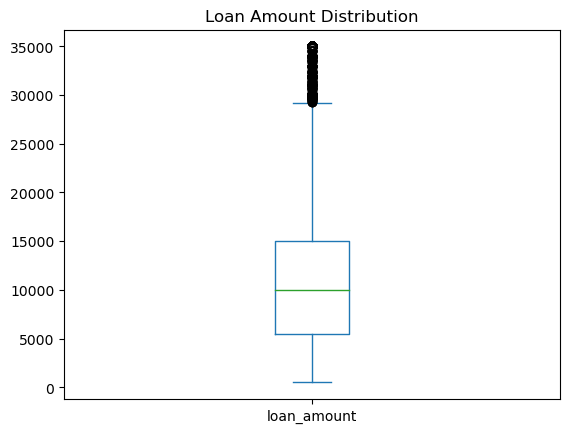

In [19]:
df['loan_amount'].plot(kind='box', title='Loan Amount Distribution')

In [20]:

print("Median of Loan Amount",df["loan_amount"].median())

print("Quantilewise loan_amount",df[['loan_amount']].quantile([0.25, 0.5, 0.75,0.95]))

df["loan_amount"].describe()

# Observation =  As we can clearly see in the median is 10,000, 
# Mean we have not considered as meanis influenced by outliers,
# There is sudden rise in the loan_amount which clearly says that it has outliers.

Median of Loan Amount 10000.0
Quantilewise loan_amount       loan_amount
0.25       5500.0
0.50      10000.0
0.75      15000.0
0.95      25000.0


count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amount, dtype: float64

### Method 1

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

### Method 2

cols=["loan_amount"]
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
df= df[df['loan_amount'] < df['loan_amount'].quantile(.95)]

<Axes: title={'center': 'Loan Amount'}>

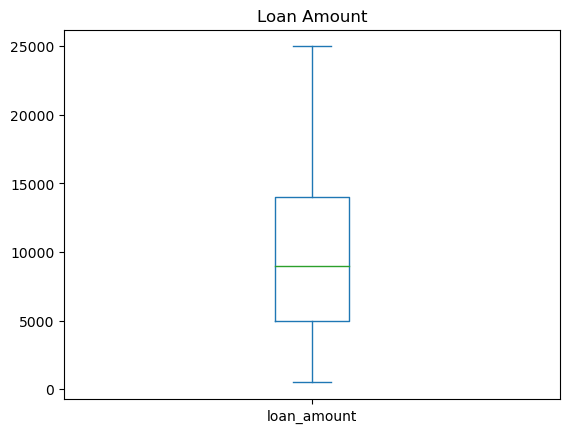

In [22]:
# Box plot after removing outliers

df['loan_amount'].plot(kind='box', title='Loan Amount')

##### =============================================================== 

### Analysis

#### Columns Considered for Analysis


| Sr No. | Columns | Explanation |
| :- | -: | :-: |
| 1. | loan_amount | Yes | 
| 2. | term_in_months |  |
| 3. | interest_rate_in_% |  | 
| 4. | employee_length_in_years | Yes | 
| 5. | annual_income | Yes | 
| 6. | DTI | |
| 7. | no_open_credit_lines | |
| 8. | revolving_credit_bal| |
| 9. | revolving_credit_utilization_in_% | |
| 10. | total_no_credit_lines | |

##### Q] Find out the correlation between columns for Fully Paid applicants

In [23]:
fully_paid=df[df["loan_status"]=="Fully Paid"]
fully_paid.shape
# ==> Conclusions
# ==> They are taking less loan at less rate of interest for 36 term months 
# ==> There term of months are increasing but installments are decreasing ==> Good ==> Causing there Debt-to-Income to decrease
# ==> Why answer is because they have less DTI(Debt-to-Income) ==> 12.94 median


(30763, 29)

In [24]:
fully_paid.corr()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.261558,0.195590,0.933236,0.112754,0.193021,0.074824,0.164338,0.260389,0.069152,0.213560,0.966967,0.983098,0.692745,0.469735
term_in_months,0.261558,1.000000,0.375120,-0.005059,0.077518,0.013479,0.069880,0.029836,0.030870,0.048807,0.072351,0.329403,0.243586,0.521060,0.303123
interest_rate_in_%,0.195590,0.375120,1.000000,0.194919,-0.032967,0.007551,0.107961,-0.023251,0.052424,0.477703,-0.090750,0.303968,0.208273,0.532077,0.182513
installment,0.933236,-0.005059,0.194919,1.000000,0.087091,0.194565,0.064845,0.157365,0.256916,0.104307,0.184437,0.921104,0.956843,0.596246,0.395384
employee_length_in_years,0.112754,0.077518,-0.032967,0.087091,1.000000,0.113622,0.047545,0.096016,0.148287,0.003871,0.210766,0.109697,0.112451,0.075777,0.079264
annual_income,0.193021,0.013479,0.007551,0.194565,0.113622,1.000000,-0.118703,0.144884,0.255287,0.017345,0.218417,0.181603,0.192285,0.106228,0.100376
dti,0.074824,0.069880,0.107961,0.064845,0.047545,-0.118703,1.000000,0.287451,0.228820,0.279167,0.225334,0.093283,0.075423,0.127471,0.025445
no_open_credit_lines,0.164338,0.029836,-0.023251,0.157365,0.096016,0.144884,0.287451,1.000000,0.277575,-0.100213,0.686101,0.158260,0.162805,0.107494,0.073220
revolving_credit_bal,0.260389,0.030870,0.052424,0.256916,0.148287,0.255287,0.228820,0.277575,1.000000,0.304533,0.296975,0.252049,0.254905,0.184792,0.096659
revolving_credit_utilization_in_%,0.069152,0.048807,0.477703,0.104307,0.003871,0.017345,0.279167,-0.100213,0.304533,1.000000,-0.081074,0.119141,0.073670,0.233387,0.006802


In [25]:
print("fully_paid ==> Median of DTI ==>",fully_paid["dti"].median())

fully_paid ==> Median of DTI ==> 13.17


In [26]:
fully_paid.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000,3.076300e+04,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000,30763.000000
mean,9621.694081,40.586549,10.824985,287.624581,4.933069,6.619953e+04,13.132883,9.187433,12352.495823,46.964113,21.696161,11224.906121,9452.967006,1771.075480,2666.577317
std,5570.301596,9.436294,3.527593,166.863267,3.335689,6.018794e+04,6.687618,4.364806,14941.000681,28.291550,11.281518,6765.832813,5429.051147,1739.401021,3800.468189
min,500.000000,36.000000,5.000000,15.000000,1.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,2.000000,526.000000,500.000000,6.000000,0.000000
25%,5000.000000,36.000000,8.000000,160.000000,2.000000,4.000000e+04,7.960000,6.000000,3425.000000,23.000000,13.000000,5919.000000,5000.000000,624.000000,240.000000
50%,8575.000000,36.000000,11.000000,259.000000,4.000000,5.700000e+04,13.170000,8.000000,8214.000000,47.000000,20.000000,9958.000000,8475.000000,1207.000000,720.000000
75%,13000.000000,36.000000,13.000000,385.000000,8.000000,8.000000e+04,18.400000,12.000000,15677.500000,70.000000,28.000000,15297.000000,12800.000000,2311.000000,3757.000000
max,24975.000000,60.000000,24.000000,902.000000,10.000000,6.000000e+06,29.990000,44.000000,149527.000000,99.000000,90.000000,39175.000000,24975.000000,15175.000000,24742.000000


In [27]:
f=fully_paid[['home_ownership','verification_status','grade','sub_grade']]
f.describe()

,home_ownership,verification_status,grade,sub_grade
count,30763,30763,30763,30763
unique,5,3,7,35
top,RENT,Not Verified,B,A4
freq,15014,14388,9625,2624


<Axes: >

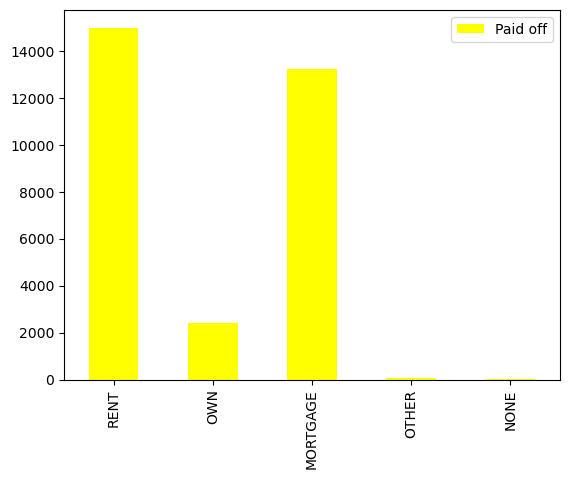

In [28]:
FullyPaidOwnershipStatus=df[df["loan_status"]=='Fully Paid']

index=np.array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'])

a=lambda x:FullyPaidOwnershipStatus[FullyPaidOwnershipStatus["home_ownership"]==x]["home_ownership"].count()

b=list(map(a,index))
state_df = pd.DataFrame({
                             'Paid off':b},
                            index=index
                        )
                        
state_df.plot(kind='bar', label='index', color="yellow")

<Axes: >

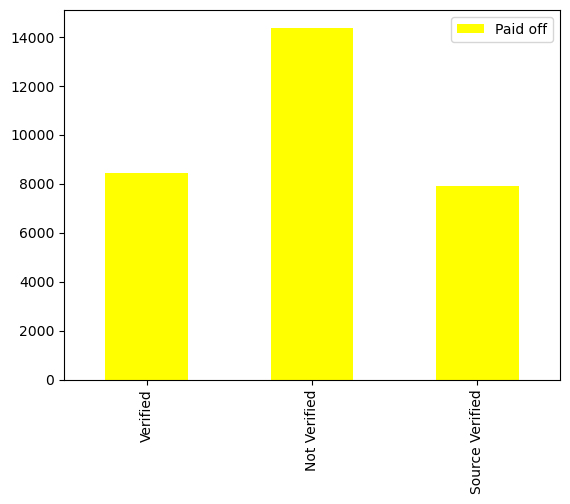

In [29]:
FullyPaidVerificationStatus=df[df["loan_status"]=='Fully Paid']
index1=np.array(['Verified', 'Not Verified', 'Source Verified'])
ab=lambda x:FullyPaidVerificationStatus[FullyPaidVerificationStatus["verification_status"]==x]["verification_status"].count()

bb=list(map(ab,index1))
FullyPaidVerificationStatus_df = pd.DataFrame({
                             'Paid off':bb},
                            index=index1
                        )
                        
FullyPaidVerificationStatus_df.plot(kind='bar', label='index', color="yellow")

##### Analysis Observation:- Factors due to which Individual is likely to fully pay the LOAN
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is inversely proportional to Installments  | Yes | As number of Term months are completing the installment are reducing, That means they are paying installments on Time |
| 2. Relative Terms_in_months is 36 months | Yes | For 36 months they are paying 13% interest which is one of the factors to succeed |
| 3. Median of DTI is 12.0 | Yes | Individual is able to manage Debit to Income ratio |
| 4. Loan Amount is Comparatively Low (mean :- 8482)| Yes | Less Loan amount is easy to pay back |
| 5. Grade A of Sub Grade A4 is the best Grade | Yes | |

###### Factors like Home_ownership and Verified does not have impact and is not likely that best case applicant will repay loan

###### ===========================================================================

#### Q] Find out the correlation between columns for Charged Off applicants

In [30]:
least_paid=df[(df["loan_status"]=="Charged Off") ]

# ==> Observations
# ==> They are taking more loan at higher rate of interest for 60 term months 
# ==> There term of months are increasing but installments are not decreasing Why?
# ==> Why answer is because they have more DTI(Debt-to-Income)==Median 15.0

In [31]:
print("least_paid ==> Median of DTI ==>",least_paid["dti"].median())

least_paid ==> Median of DTI ==> 14.25


In [32]:
least_paid.corr()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
loan_amount,1.000000,0.339431,0.266633,0.919821,0.163824,0.266428,0.076129,0.181620,0.256126,0.047317,0.247070,0.648249,0.537262,0.658720,0.313586
term_in_months,0.339431,1.000000,0.428418,0.046685,0.117690,0.040628,0.057298,0.049855,0.036011,0.032212,0.096995,0.226614,0.047723,0.466112,0.016927
interest_rate_in_%,0.266633,0.428418,1.000000,0.242219,0.014228,0.080135,0.026647,0.019501,0.023690,0.368632,-0.047136,0.191872,0.003947,0.441583,0.064768
installment,0.919821,0.046685,0.242219,1.000000,0.134173,0.276779,0.049638,0.172420,0.240541,0.077429,0.208864,0.620618,0.557053,0.560220,0.337243
employee_length_in_years,0.163824,0.117690,0.014228,0.134173,1.000000,0.131226,0.053096,0.094962,0.140477,0.036717,0.176620,0.132744,0.117457,0.147124,0.032302
annual_income,0.266428,0.040628,0.080135,0.276779,0.131226,1.000000,-0.084696,0.209125,0.353724,0.077990,0.268473,0.210693,0.186492,0.187740,0.092155
dti,0.076129,0.057298,0.026647,0.049638,0.053096,-0.084696,1.000000,0.295160,0.240769,0.226983,0.274057,0.047782,0.017232,0.077901,-0.007701
no_open_credit_lines,0.181620,0.049855,0.019501,0.172420,0.094962,0.209125,0.295160,1.000000,0.330067,-0.047119,0.687112,0.114655,0.099748,0.118316,0.033761
revolving_credit_bal,0.256126,0.036011,0.023690,0.240541,0.140477,0.353724,0.240769,0.330067,1.000000,0.295522,0.355861,0.150947,0.130492,0.142094,0.076509
revolving_credit_utilization_in_%,0.047317,0.032212,0.368632,0.077429,0.036717,0.077990,0.226983,-0.047119,0.295522,1.000000,-0.013693,0.047861,-0.008856,0.130216,0.010127


In [33]:
least_paid.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5.052000e+03,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000,5052.000000
mean,10197.995843,45.349169,12.962985,289.836896,5.013856,5.820077e+04,13.964238,9.042162,12369.652613,54.949129,20.762668,5773.189430,3491.427158,1756.549683,284.677949
std,5935.307760,11.704709,3.596785,167.387222,3.344919,4.424791e+04,6.618892,4.535699,14182.486132,27.890444,11.246086,5073.576785,3263.875650,1849.605925,424.513074
min,900.000000,36.000000,5.000000,22.000000,1.000000,4.080000e+03,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,36.000000,11.000000,161.000000,2.000000,3.600000e+04,9.010000,6.000000,3683.000000,34.000000,12.000000,2027.750000,1114.000000,506.000000,109.750000
50%,9600.000000,36.000000,13.000000,266.000000,4.000000,5.000000e+04,14.250000,8.000000,8451.500000,58.000000,19.000000,4361.500000,2494.000000,1128.000000,220.000000
75%,15000.000000,60.000000,15.000000,391.000000,8.000000,7.000000e+04,19.320000,11.000000,15934.250000,78.000000,28.000000,7986.250000,4818.500000,2342.500000,367.000000
max,24925.000000,60.000000,24.000000,892.000000,10.000000,1.250000e+06,29.850000,38.000000,147365.000000,99.000000,74.000000,31750.000000,23024.000000,15246.000000,12390.000000


In [34]:
l=least_paid[['home_ownership','verification_status','grade','sub_grade']]
l.describe()

,home_ownership,verification_status,grade,sub_grade
count,5052,5052,5052,5052
unique,4,3,7,35
top,RENT,Not Verified,B,B5
freq,2649,2105,1335,328


<Axes: >

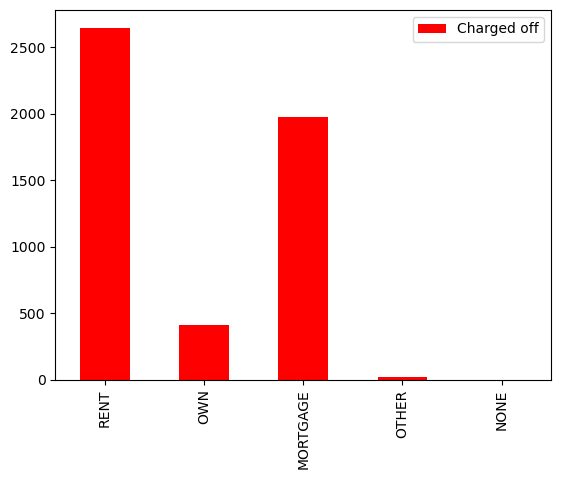

In [35]:
ChargedOffOwnershipStatus=df[df["loan_status"]=='Charged Off']

index=np.array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'])

a=lambda x:ChargedOffOwnershipStatus[ChargedOffOwnershipStatus["home_ownership"]==x]["home_ownership"].count()

owership_cnt=list(map(a,index))
owership_cnt_df = pd.DataFrame({
                             'Charged off':owership_cnt},
                            index=index
                        )
                        
owership_cnt_df.plot(kind='bar', label='index', color="red")

<Axes: >

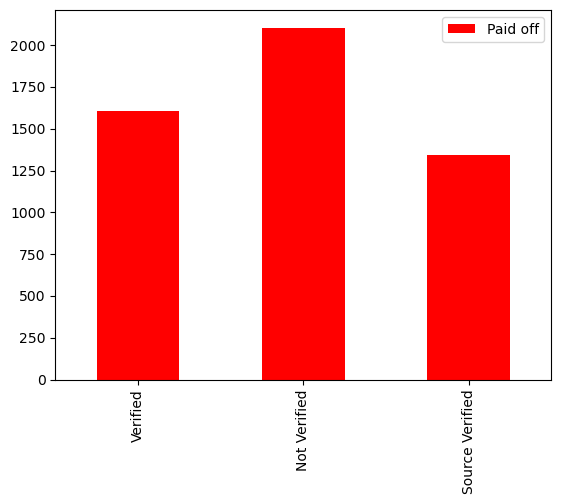

In [36]:
ChargedOffVerificationStatus=df[df["loan_status"]=='Charged Off']
index1=np.array(['Verified', 'Not Verified', 'Source Verified'])
ab=lambda x:ChargedOffVerificationStatus[ChargedOffVerificationStatus["verification_status"]==x]["verification_status"].count()

bb=list(map(ab,index1))
ChargedOffVerificationStatus_df = pd.DataFrame({
                             'Paid off':bb},
                            index=index1
                        )
                        
ChargedOffVerificationStatus_df.plot(kind='bar', label='index', color="red")

#### Observations:-
| Findings | Ideal Situation | Explanation |
| :- | -: | :-: |
| 1. Terms_in_month is proportional to Installments  | NO | As number of Term months are completing the installment are not reducing, Means Individuals are not Paying installments on Time |
| 2. Relative Terms_in_months is 60 months | NO | For 60 months they are paying 15% interest rate which is one of the factors to default |
| 3. Median of DTI is 14.06 | Likely NO | Individual may not be able to manage Debit to Income ratio |
| 4. Loan Amount Taken is more (mean :- 9907)  | Likey NO | Big Loan amounts hard to pay back |
| 5. Grade B of Sub-Grade B5 is the most frequent type and most likely to default | Likely NO | Installment is negatively proportioanl to DTI , Most probably they are left with no income after installment or They are paying installment by taking some other loan 2. More Loan applicants are form this Sub-grade |


###### Factors like Home_ownership and Verified does not have impact and is not likely that best case applicant will repay loan

#### Top 20 States with Fully Paid Applicants - Univariate Analysis

<Axes: >

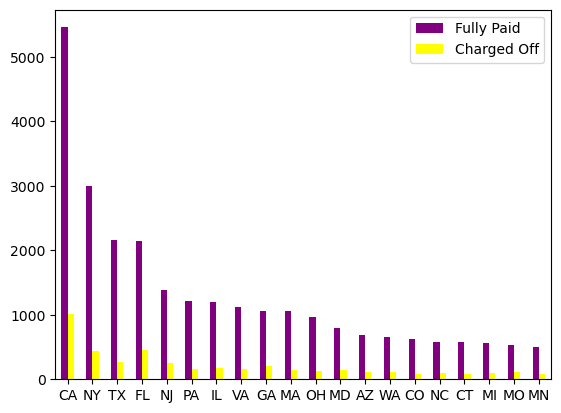

In [37]:
fully_paid_df = fully_paid['address_state'].value_counts().rename_axis('states').reset_index(name='fully_paid_freq')
charged_off_df = least_paid['address_state'].value_counts().rename_axis('states').reset_index(name='least_paid_freq')
merged_df = pd.merge(fully_paid_df, charged_off_df, on='states')

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['states']

state_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))
state_df[:20].plot.bar(rot=0, color=["purple","yellow"])

####  Observation => From the Graph above "CA" is the state which has largest number of Applicants and Fully Paid Applicants

<Axes: >

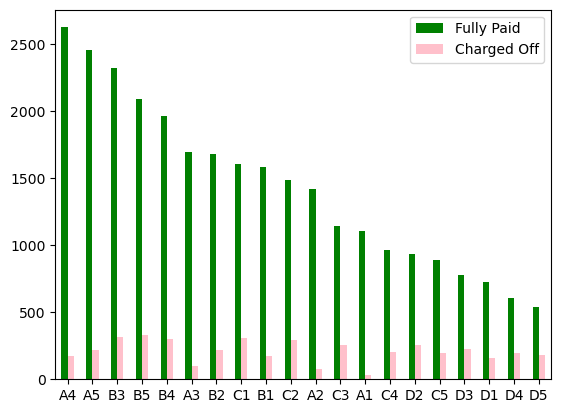

In [38]:
fp_sub_grade=fully_paid["sub_grade"].value_counts().rename_axis('sub_grade').reset_index(name='fully_paid_freq')
charged_off_sub_grade = least_paid['sub_grade'].value_counts().rename_axis('sub_grade').reset_index(name='least_paid_freq')

merged_df = pd.merge(fp_sub_grade, charged_off_sub_grade, on='sub_grade')
merged_df['success_percent'] = (merged_df["fully_paid_freq"] / (merged_df["fully_paid_freq"] + merged_df["least_paid_freq"])*100)

fully_paid_freq_arr = merged_df["fully_paid_freq"]
least_paid_freq_arr = merged_df["least_paid_freq"]
index = merged_df['sub_grade']

new_df = pd.DataFrame({'Fully Paid': np.array(fully_paid_freq_arr),
                   'Charged Off': np.array(least_paid_freq_arr)},
                  index=np.array(index))

new_df[:20].plot.bar(rot=0,color=["green","pink"])

In [39]:
def risk_fuction(percen):
    if(percen>90):
        return "No Risk"
    elif (percen>70):
        return "Good"
    elif (percen>55):
        return "Average Can be Considered"
    else:
        return "Reject"
    
merged_df['risk_factor']=merged_df["success_percent"].apply(risk_fuction) # Driven Columns
merged_df.sort_values(by="success_percent", ascending=False)

,sub_grade,fully_paid_freq,least_paid_freq,success_percent,risk_factor
12,A1,1109,30,97.366111,No Risk
10,A2,1419,73,95.107239,No Risk
5,A3,1695,101,94.376392,No Risk
0,A4,2624,175,93.747767,No Risk
1,A5,2452,217,91.869614,No Risk
8,B1,1581,170,90.291262,No Risk
6,B2,1680,220,88.421053,Good
2,B3,2317,316,87.998481,Good
4,B4,1960,301,86.687307,Good
3,B5,2087,328,86.418219,Good


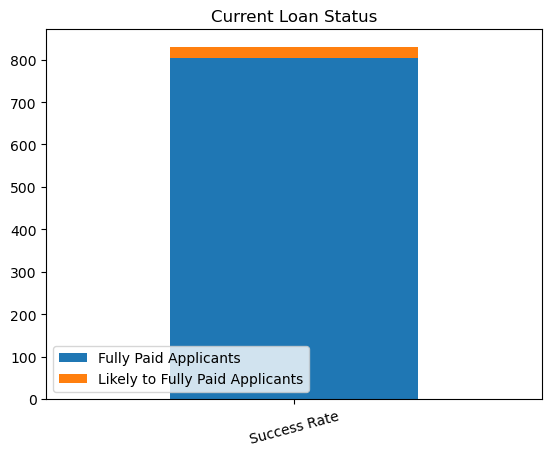

In [40]:
df["loan_status"].unique()
current_df=df[(df["loan_status"]=="Current")]
current_df.shape # 497 records of Current


#print(current_df["sub_grade"].value_counts())
current_cnt_df=current_df["sub_grade"].value_counts().rename_axis('sub_grade').reset_index(name='Count')
#["D5","E1","E2","E3","E4","E5","F1","F2","F3","F4"]
#current_df.groupby(["sub_grade"]).sum()
current_merged_df = pd.merge(current_cnt_df, merged_df, on='sub_grade' , how="left")


good=current_merged_df[current_merged_df['risk_factor']=="Good"]
#print("Good===>",good['Count'].sum())

Average=current_merged_df[current_merged_df['risk_factor']=="Average Can be Considered"]
#print("Average===>",Average['Count'].sum())


Reject=current_merged_df[current_merged_df['risk_factor']=="Reject"]
#print("Reject===>",Reject['Count'].sum())

# A python dictionary

data = {"Fully Paid Applicants":[good['Count'].sum()],

        "Likely to Fully Paid Applicants":[Average['Count'].sum()]

        };

index     = ["Success Rate"];


# Dictionary loaded into a DataFrame

dataFrame = pd.DataFrame(data=data, index=index);

 

# Draw a vertical bar chart

dataFrame.plot.bar(stacked=True,rot=15, title="Current Loan Status");

#plot.show(block=True);

#### Observations:-
| Findings | Risk |
| :- | :-: |
| Out of 850 Loan Applicants around 800 applications fall in Good Category | 10% to 15% likely to Default |
| Out of 850 , 50+ Applicants are of Average Category | 30% likely to Charge off |

### Comparing worst best case A1 with G3 Grade

In [41]:
A1=df[(df["sub_grade"]=="A1") & (df["loan_status"]=="Fully Paid")]
A1.describe() 

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,1109.000000,1109.0,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,7262.060415,36.0,5.552750,219.367899,5.820559,67571.089270,10.710803,9.632101,9924.383228,19.099188,25.153291,7805.037872,7249.233544,555.505861,1748.739405
std,3985.453504,0.0,0.591886,120.943478,3.405942,38671.401039,6.789585,3.427155,15388.949038,15.630119,9.761041,4300.539662,3979.792351,368.025225,2478.726276
min,725.000000,36.0,5.000000,22.000000,1.000000,6000.000000,0.000000,2.000000,0.000000,0.000000,5.000000,777.000000,725.000000,10.000000,1.000000
25%,4000.000000,36.0,5.000000,121.000000,3.000000,42000.000000,5.280000,7.000000,2339.000000,7.000000,18.000000,4343.000000,4000.000000,280.000000,185.000000
50%,6000.000000,36.0,6.000000,182.000000,5.000000,60000.000000,9.910000,9.000000,5088.000000,15.000000,24.000000,6568.000000,6000.000000,478.000000,457.000000
75%,10000.000000,36.0,6.000000,304.000000,10.000000,83004.000000,15.360000,12.000000,11456.000000,27.000000,31.000000,10858.000000,10000.000000,786.000000,2511.000000
max,17500.000000,36.0,7.000000,543.000000,10.000000,480000.000000,29.920000,21.000000,145518.000000,89.000000,61.000000,19411.000000,17500.000000,1976.000000,14450.000000


In [42]:
G3=df[(df["sub_grade"]=="G3") & (df["loan_status"]=="Charged Off")]
G3.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,16645.31250,54.000000,20.625000,501.500000,5.687500,66226.937500,15.887500,10.500000,11571.750000,83.437500,23.687500,8753.312500,3608.625000,4444.250000,448.812500
std,7197.62819,10.733126,1.360147,234.579908,3.646345,20326.424534,6.192294,8.694826,7864.562175,21.746935,15.674688,7694.264147,3471.527039,3821.164037,280.341035
min,4200.00000,36.000000,18.000000,113.000000,1.000000,30000.000000,7.510000,3.000000,126.000000,25.000000,7.000000,2183.000000,538.000000,1013.000000,47.000000
25%,9500.00000,54.000000,20.000000,291.500000,2.500000,50000.000000,9.532500,5.000000,5508.500000,76.000000,11.750000,3685.500000,1616.000000,1758.250000,211.250000
50%,20000.00000,60.000000,20.000000,539.000000,5.000000,67516.000000,18.760000,7.500000,12634.500000,94.500000,19.500000,5348.500000,2305.500000,2890.500000,429.500000
75%,22000.00000,60.000000,22.000000,650.250000,10.000000,81250.000000,20.522500,11.250000,16688.250000,98.000000,33.500000,11496.000000,3610.500000,5830.000000,681.750000
max,24000.00000,60.000000,23.000000,876.000000,10.000000,105000.000000,24.520000,31.000000,23895.000000,99.000000,57.000000,31471.000000,12827.000000,15246.000000,876.000000


| Worst Case G3 | Good Case A1 |
| :- | :-: |
| Loan Amount is 16645 | Loan amount is 7262 |
| Terms is 60 months |  Terms is 36 months |
| Rate of Interest is 20% | Rate of Interest is 5% |
| Employee Length is 5 | Employee Length is 5 | 
| DTI is 15 | DTI is 10 |
| No_open_credit_lines is 10 | No_open_credit_lines is 9 |
| Revolving_credit_bal is 11571.750000	 | Revolving_credit_bal is 9924.383228 | 
| Total_no_credit_lines is 23 | Total_no_credit_lines is 25 |


#### Observation :- All the important factors are almost half in Ratio

### Comparing worst best case A1 with B5 Grade

In [43]:
A1=df[(df["sub_grade"]=="A1") & (df["loan_status"]=="Fully Paid")]
A1.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,1109.000000,1109.0,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,7262.060415,36.0,5.552750,219.367899,5.820559,67571.089270,10.710803,9.632101,9924.383228,19.099188,25.153291,7805.037872,7249.233544,555.505861,1748.739405
std,3985.453504,0.0,0.591886,120.943478,3.405942,38671.401039,6.789585,3.427155,15388.949038,15.630119,9.761041,4300.539662,3979.792351,368.025225,2478.726276
min,725.000000,36.0,5.000000,22.000000,1.000000,6000.000000,0.000000,2.000000,0.000000,0.000000,5.000000,777.000000,725.000000,10.000000,1.000000
25%,4000.000000,36.0,5.000000,121.000000,3.000000,42000.000000,5.280000,7.000000,2339.000000,7.000000,18.000000,4343.000000,4000.000000,280.000000,185.000000
50%,6000.000000,36.0,6.000000,182.000000,5.000000,60000.000000,9.910000,9.000000,5088.000000,15.000000,24.000000,6568.000000,6000.000000,478.000000,457.000000
75%,10000.000000,36.0,6.000000,304.000000,10.000000,83004.000000,15.360000,12.000000,11456.000000,27.000000,31.000000,10858.000000,10000.000000,786.000000,2511.000000
max,17500.000000,36.0,7.000000,543.000000,10.000000,480000.000000,29.920000,21.000000,145518.000000,89.000000,61.000000,19411.000000,17500.000000,1976.000000,14450.000000


In [44]:
B5=df[(df["sub_grade"]=="B5") & (df["loan_status"]=="Charged Off")]
B5.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,10310.594512,43.975610,11.201220,284.981707,5.158537,53510.920732,14.683811,8.804878,12520.777439,51.987805,19.899390,5702.115854,3799.237805,1501.993902,290.195122
std,5978.159807,11.322328,0.651321,165.017911,3.360936,28649.470285,6.827916,3.863699,13788.626954,26.762173,9.459988,4981.808177,3601.506485,1395.011216,480.304852
min,1000.000000,36.000000,9.000000,32.000000,1.000000,4080.000000,0.390000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,5193.750000,36.000000,11.000000,163.000000,2.000000,35000.000000,10.077500,6.000000,4128.250000,32.000000,12.750000,2064.000000,1246.500000,497.000000,132.750000
50%,10000.000000,36.000000,11.000000,264.000000,5.000000,48000.000000,14.800000,8.000000,8621.500000,55.000000,19.000000,4073.000000,2711.000000,1071.500000,229.500000
75%,15000.000000,60.000000,12.000000,355.000000,8.250000,64800.000000,20.105000,11.000000,16011.750000,72.000000,25.000000,7923.250000,5125.250000,2029.250000,338.250000
max,24925.000000,60.000000,12.000000,805.000000,10.000000,220000.000000,29.600000,22.000000,110441.000000,98.000000,51.000000,28413.000000,23024.000000,7422.000000,8184.000000



#### Observation :- 

| Bad Case B5 | Good Case A1 |
| :- | :-: |
| Average Loan Amount is 10239.003165  | Average Loan Amount is 7251.689520	 |
| Terms is 60 months |  Terms is 36 months |
| Rate of Interest is 11% | Rate of Interest is 5% |
| DTI is 14 | DTI is 10 |
| revolving_credit_utilization_in_% is 51.987805 | A is 19.099188	
| No_open_credit_lines is 8 | No_open_credit_lines is 9 |
| Total_no_credit_lines is 19 | Total_no_credit_lines is 25 |




### Comparing Best case A1-Fully Paid with B-Charged Off Grade


In [45]:
A1pass=df[(df["sub_grade"]=="A1") & (df["loan_status"]=="Fully Paid")]
A1pass.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,1109.000000,1109.0,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,7262.060415,36.0,5.552750,219.367899,5.820559,67571.089270,10.710803,9.632101,9924.383228,19.099188,25.153291,7805.037872,7249.233544,555.505861,1748.739405
std,3985.453504,0.0,0.591886,120.943478,3.405942,38671.401039,6.789585,3.427155,15388.949038,15.630119,9.761041,4300.539662,3979.792351,368.025225,2478.726276
min,725.000000,36.0,5.000000,22.000000,1.000000,6000.000000,0.000000,2.000000,0.000000,0.000000,5.000000,777.000000,725.000000,10.000000,1.000000
25%,4000.000000,36.0,5.000000,121.000000,3.000000,42000.000000,5.280000,7.000000,2339.000000,7.000000,18.000000,4343.000000,4000.000000,280.000000,185.000000
50%,6000.000000,36.0,6.000000,182.000000,5.000000,60000.000000,9.910000,9.000000,5088.000000,15.000000,24.000000,6568.000000,6000.000000,478.000000,457.000000
75%,10000.000000,36.0,6.000000,304.000000,10.000000,83004.000000,15.360000,12.000000,11456.000000,27.000000,31.000000,10858.000000,10000.000000,786.000000,2511.000000
max,17500.000000,36.0,7.000000,543.000000,10.000000,480000.000000,29.920000,21.000000,145518.000000,89.000000,61.000000,19411.000000,17500.000000,1976.000000,14450.000000


In [46]:
Bfail=df[(df["grade"]=="B") & (df["loan_status"]=="Charged Off")]
Bfail.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,9745.355805,42.939326,10.502622,274.097378,4.958052,56649.225468,13.934075,9.053933,12123.089139,47.385768,21.265169,5447.416479,3731.095131,1290.576030,280.501873
std,5781.265623,10.884775,0.930791,163.753594,3.332144,41105.306909,6.786094,3.933491,14343.538701,26.346559,10.690905,4616.280152,3365.163947,1170.641804,517.850085
min,1000.000000,36.000000,8.000000,30.000000,1.000000,4080.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,36.000000,10.000000,153.500000,2.000000,35000.000000,8.755000,6.000000,3534.000000,27.000000,13.000000,1984.000000,1218.000000,458.500000,103.000000
50%,8875.000000,36.000000,11.000000,242.000000,4.000000,49000.000000,14.400000,8.000000,7980.000000,48.000000,20.000000,4107.000000,2743.000000,928.000000,210.000000
75%,14000.000000,60.000000,11.000000,370.500000,8.000000,68729.000000,19.370000,11.000000,15732.500000,68.000000,28.000000,7455.500000,5164.500000,1796.500000,333.500000
max,24925.000000,60.000000,12.000000,807.000000,10.000000,780000.000000,29.600000,24.000000,141165.000000,99.000000,63.000000,28413.000000,23024.000000,7607.000000,12390.000000






| B overall | Good Case A1 |
| :- | :-: |
| Average Loan Amount is 9745.35	  | Average Loan Amount is 7251.689520	 |
| Terms is 60 months |  Terms is 36 months |
| Rate of Interest is 10% | Rate of Interest is 5% |
| Annual income is 56649.22 | Annaul income is 67571.08 |
| Revolving Credit balance is 12123.089139 | A is 9924.383228
| DTI is 13 | DTI is 10 |
| revolving_credit_utilization_in_% is 47 | A is 19.099188	
| No_open_credit_lines is 9 | No_open_credit_lines is 9 |
| Total_no_credit_lines is 21 | Total_no_credit_lines is 25 |



#### Observation :- 

### Comparing B Pass with B fails

In [47]:
Bpass=df[(df["grade"]=="B") & (df["loan_status"]=="Fully Paid")]
Bpass.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000,9625.000000
mean,9855.992208,40.134234,10.376312,294.178701,4.921143,65222.925195,13.391030,9.087065,12774.925195,46.825558,21.406442,11310.359481,9693.139117,1616.480727,2677.296000
std,5736.704367,9.063016,0.951276,172.564119,3.328776,44060.478506,6.581307,4.148068,14992.035094,25.789298,11.067709,6600.353152,5587.254522,1230.548262,3819.739289
min,500.000000,36.000000,6.000000,16.000000,1.000000,4800.000000,0.000000,2.000000,0.000000,0.000000,3.000000,526.000000,500.000000,9.000000,0.000000
25%,5000.000000,36.000000,10.000000,162.000000,2.000000,40000.000000,8.360000,6.000000,3735.000000,27.000000,13.000000,5892.000000,5000.000000,704.000000,251.000000
50%,9000.000000,36.000000,10.000000,262.000000,4.000000,56000.000000,13.490000,8.000000,8822.000000,48.000000,20.000000,10354.000000,9000.000000,1308.000000,705.000000
75%,14000.000000,36.000000,11.000000,395.000000,8.000000,80000.000000,18.600000,12.000000,16148.000000,67.000000,28.000000,15697.000000,13499.000000,2256.000000,3797.000000
max,24800.000000,60.000000,12.000000,829.000000,10.000000,948000.000000,29.930000,32.000000,149527.000000,99.000000,90.000000,32318.000000,24800.000000,8318.000000,24742.000000


In [48]:
Bfail=df[(df["grade"]=="B") & (df["loan_status"]=="Charged Off")]
Bfail.describe()

,loan_amount,term_in_months,interest_rate_in_%,installment,employee_length_in_years,annual_income,dti,no_open_credit_lines,revolving_credit_bal,revolving_credit_utilization_in_%,total_no_credit_lines,total_paymnt,total_received_principle,total_received_interest,last_payment_amount
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,9745.355805,42.939326,10.502622,274.097378,4.958052,56649.225468,13.934075,9.053933,12123.089139,47.385768,21.265169,5447.416479,3731.095131,1290.576030,280.501873
std,5781.265623,10.884775,0.930791,163.753594,3.332144,41105.306909,6.786094,3.933491,14343.538701,26.346559,10.690905,4616.280152,3365.163947,1170.641804,517.850085
min,1000.000000,36.000000,8.000000,30.000000,1.000000,4080.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,36.000000,10.000000,153.500000,2.000000,35000.000000,8.755000,6.000000,3534.000000,27.000000,13.000000,1984.000000,1218.000000,458.500000,103.000000
50%,8875.000000,36.000000,11.000000,242.000000,4.000000,49000.000000,14.400000,8.000000,7980.000000,48.000000,20.000000,4107.000000,2743.000000,928.000000,210.000000
75%,14000.000000,60.000000,11.000000,370.500000,8.000000,68729.000000,19.370000,11.000000,15732.500000,68.000000,28.000000,7455.500000,5164.500000,1796.500000,333.500000
max,24925.000000,60.000000,12.000000,807.000000,10.000000,780000.000000,29.600000,24.000000,141165.000000,99.000000,63.000000,28413.000000,23024.000000,7607.000000,12390.000000


Observation:- Annual Income is low in this case